# Homework 2 for Introduction to Machine Learning
## Resul KAYIM

In [2]:
# Import boston dataset and convert it into pandas dataframe

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

X, y = load_boston(return_X_y = True)
print(f"Number of examples : {X.shape[0]} and number of features : {X.shape[1]}\n")

input_data = pd.DataFrame(data = X, columns = load_boston().feature_names)
input_data.info()

Number of examples : 506 and number of features : 13

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [197]:
# Check duplicate values and missing data

In [198]:
print(f"Sum of duplicated values : {input_data.duplicated().sum()}")
input_data.duplicated()

Sum of duplicated values : 0


0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Length: 506, dtype: bool

In [199]:
print(f"Sum of missing data : {input_data.isna().sum().sum()}")
input_data.isna().sum()

Sum of missing data : 0


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [200]:
# Visualize data for each feature (pairplot,distplot)

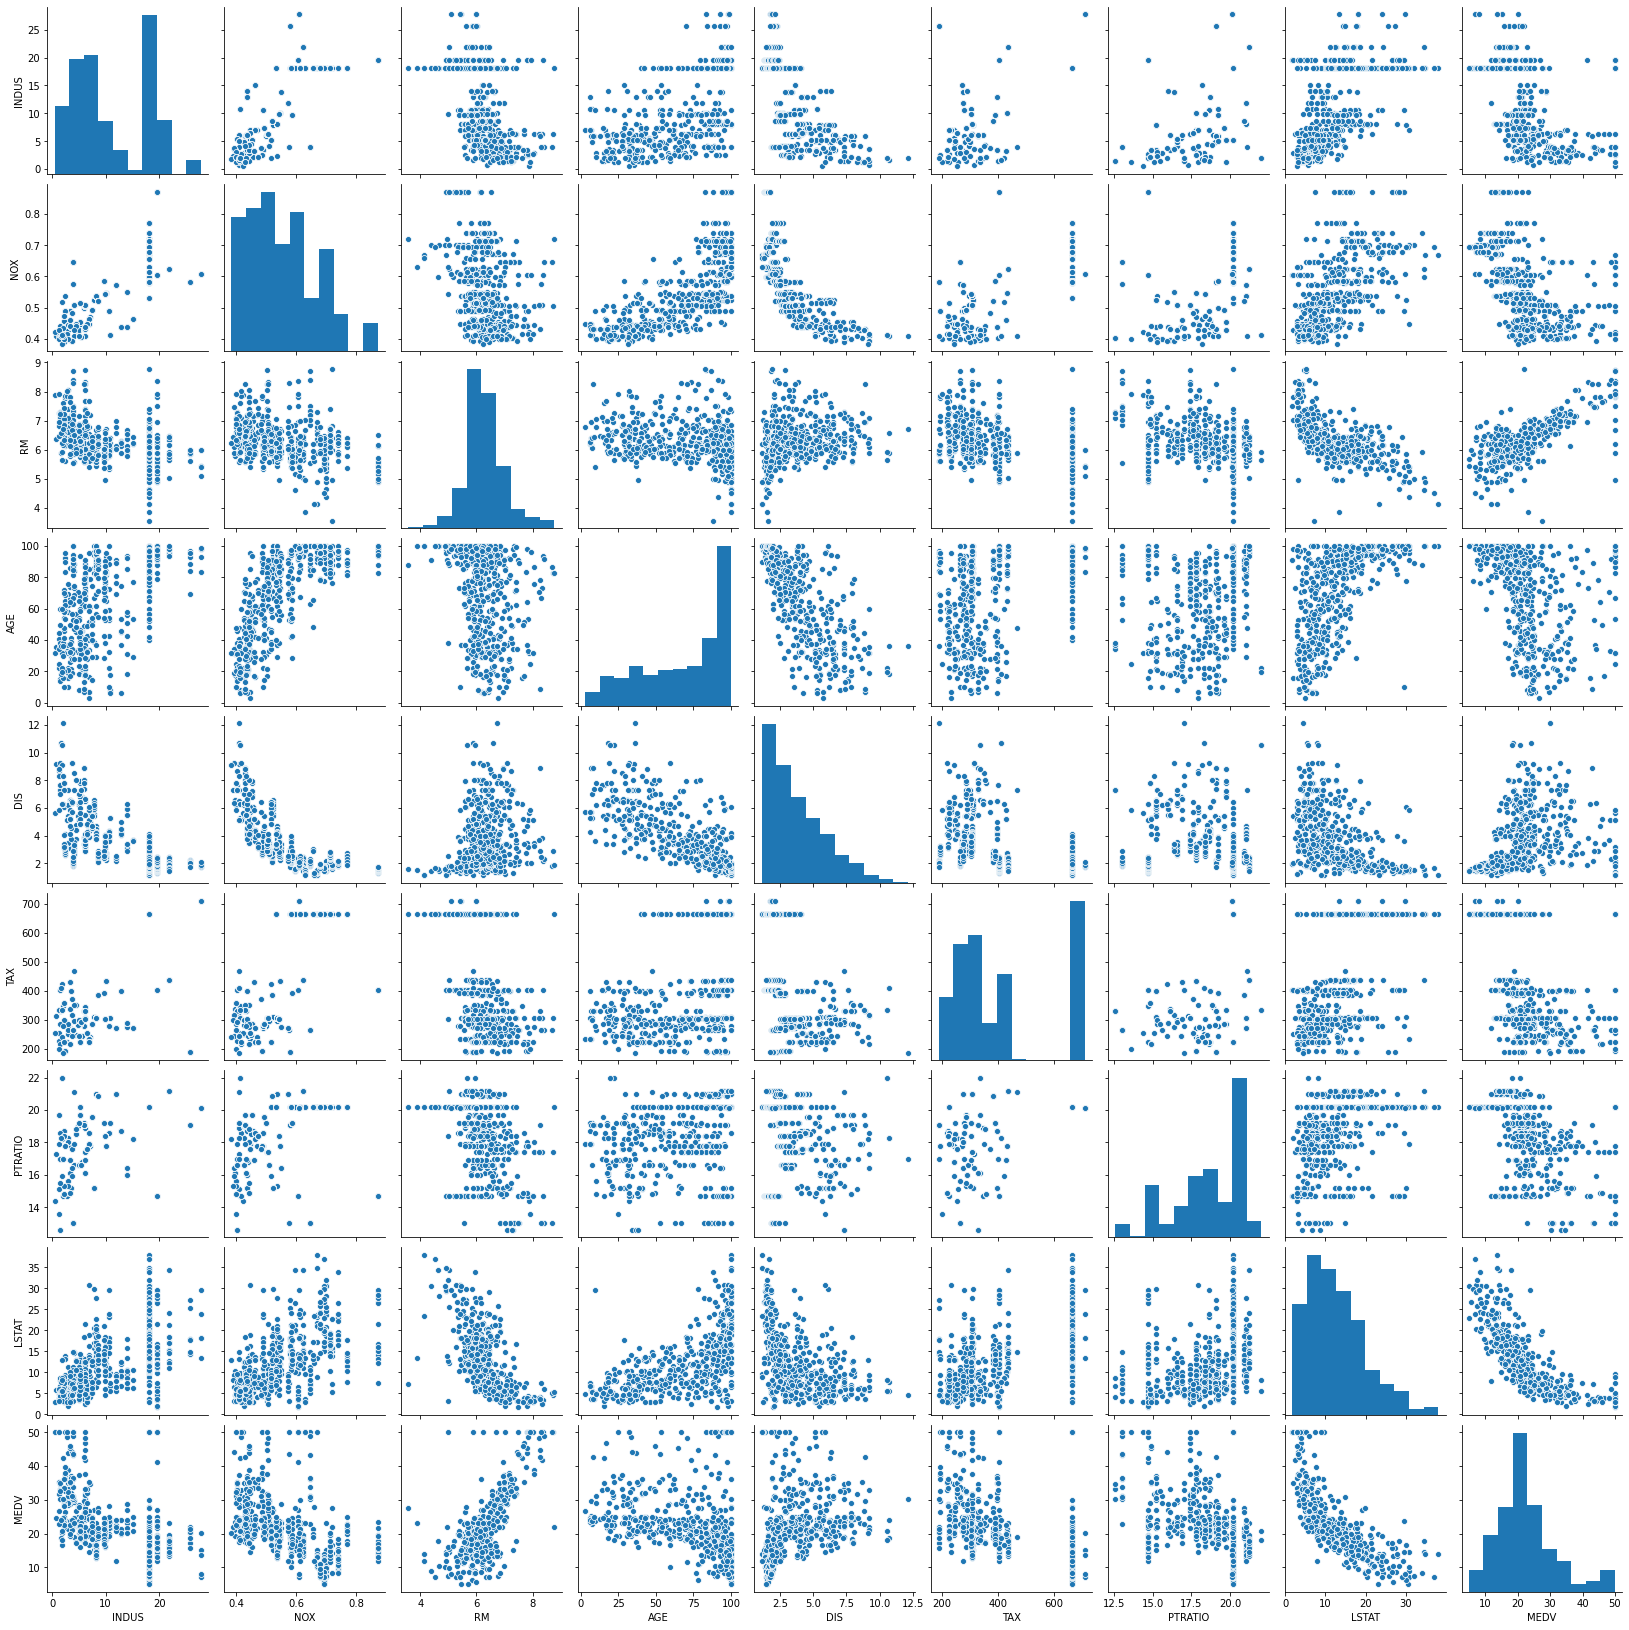

In [187]:
whole_data = input_data.copy()
whole_data['MEDV'] = y

sns.pairplot(whole_data)

In [201]:
# Draw correlation matrix

In [202]:
corr = whole_data.corr()
corr

,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT,MEDV
INDUS,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.720760,0.383248,0.603800,-0.483725
NOX,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.668023,0.188933,0.590879,-0.427321
RM,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.506456,0.261515,0.602339,-0.376955
DIS,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.534432,-0.232471,-0.496996,0.249929
TAX,0.720760,0.668023,-0.292048,0.506456,-0.534432,1.000000,0.460853,0.543993,-0.468536
PTRATIO,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.460853,1.000000,0.374044,-0.507787
LSTAT,0.603800,0.590879,-0.613808,0.602339,-0.496996,0.543993,0.374044,1.000000,-0.737663
MEDV,-0.483725,-0.427321,0.695360,-0.376955,0.249929,-0.468536,-0.507787,-0.737663,1.000000


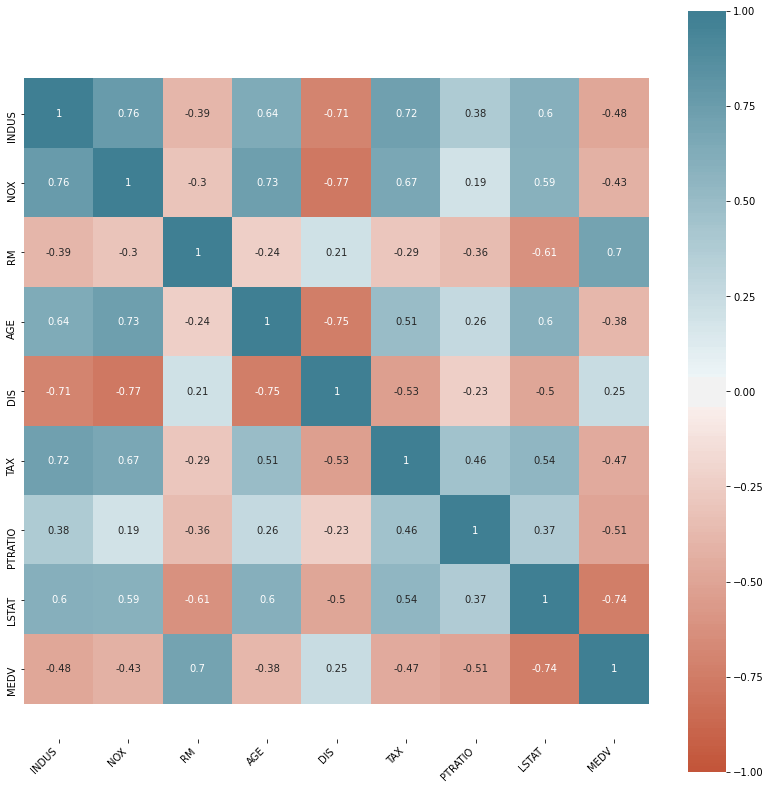

In [203]:
plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [204]:
# Drop correlated features (check correlation matrix)

In this dataset, i determined a treshold value as 0.8 so when there is a correlation value bigger that treshold value i will drop one of this corralated features.
In this case, TAX and RAD are highly correlated each other. So i dropped RAD column from this dataset.
And also i created a new dataframe named as whole_data to get correlation values between input features and output value. I dropped features which is not correlated with output. 

In [205]:
input_data.drop(['CRIM','ZN', 'CHAS', 'RAD', 'B'], axis = 1, inplace = True)
input_data.head()

,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT
0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,4.98
1,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,9.14
2,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,4.03
3,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,2.94
4,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,5.33


In [206]:
# Handle outliers (you can use IsolationForest)

In [207]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(input_data))
z

array([[1.2879095 , 0.14421743, 0.41367189, ..., 0.66660821, 1.45900038,
        1.0755623 ],
       [0.59338101, 0.74026221, 0.19427445, ..., 0.98732948, 0.30309415,
        0.49243937],
       [0.59338101, 0.74026221, 1.28271368, ..., 0.98732948, 0.30309415,
        1.2087274 ],
       ...,
       [0.11573841, 0.15812412, 0.98496002, ..., 0.80321172, 1.17646583,
        0.98304761],
       [0.11573841, 0.15812412, 0.72567214, ..., 0.80321172, 1.17646583,
        0.86530163],
       [0.11573841, 0.15812412, 0.36276709, ..., 0.80321172, 1.17646583,
        0.66905833]])

In [208]:
outliers = list(set(np.where(z > 3)[0]))
len(outliers)

17

In [209]:
new_input = input_data.drop(outliers,axis = 0).reset_index(drop = False)
display(new_input)

y_new = y[list(new_input["index"])]
len(y_new)

,index,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT
0,0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,4.98
1,1,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,9.14
2,2,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,4.03
3,3,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,2.94
4,4,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,5.33
...,...,...,...,...,...,...,...,...,...
484,501,11.93,0.573,6.593,69.1,2.4786,273.0,21.0,9.67
485,502,11.93,0.573,6.120,76.7,2.2875,273.0,21.0,9.08
486,503,11.93,0.573,6.976,91.0,2.1675,273.0,21.0,5.64
487,504,11.93,0.573,6.794,89.3,2.3889,273.0,21.0,6.48


489

In [210]:
# Normalize data

In [211]:
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(new_input)
X_norm

array([[0.        , 0.06781525, 0.31481481, ..., 0.20650096, 0.31395349,
        0.10065036],
       [0.0019802 , 0.24230205, 0.17283951, ..., 0.10325048, 0.60465116,
        0.22948281],
       [0.0039604 , 0.24230205, 0.17283951, ..., 0.10325048, 0.60465116,
        0.07122948],
       ...,
       [0.9960396 , 0.42045455, 0.38683128, ..., 0.1625239 , 0.97674419,
        0.12109012],
       [0.9980198 , 0.42045455, 0.38683128, ..., 0.1625239 , 0.97674419,
        0.14710437],
       [1.        , 0.42045455, 0.38683128, ..., 0.1625239 , 0.97674419,
        0.19046144]])

In [212]:
# Split dataset into train and test set

In [213]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_new, test_size = 0.3, random_state = 17)
print(f"Number of train examples : {X_train.shape[0]} and number of test examples : {X_test.shape[0]}\n")

Number of train examples : 342 and number of test examples : 147



In [214]:
# Import ridge and lasso models from sklearn

In [215]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score

In [216]:
# Define 5 different alpha values for lasso and fit them. Print their R^2 sore on both
# train and test.

In [217]:
alpha_valus = [0.0001, 0.001, 0.01, 0.1, 1]
for alpha in alpha_valus:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    print(f"For Alpha : {alpha} --> R^2 score for train set : {lasso.score(X_train, y_train)}")
    print(f"For Alpha : {alpha} --> R^2 score for test set : {lasso.score(X_test, y_test)}\n")
    

For Alpha : 0.0001 --> R^2 score for train set : 0.739323325158336
For Alpha : 0.0001 --> R^2 score for test set : 0.6969665744197475

For Alpha : 0.001 --> R^2 score for train set : 0.7393193049844848
For Alpha : 0.001 --> R^2 score for test set : 0.6972775273996499

For Alpha : 0.01 --> R^2 score for train set : 0.7389309348009369
For Alpha : 0.01 --> R^2 score for test set : 0.6997371492971054

For Alpha : 0.1 --> R^2 score for train set : 0.723491085787972
For Alpha : 0.1 --> R^2 score for test set : 0.6927841881340107

For Alpha : 1 --> R^2 score for train set : 0.3465417479838909
For Alpha : 1 --> R^2 score for test set : 0.34337238245271673



In [218]:
# Define 5 different alpha values for Ridg and fit them. Print their R^2 sore on both
# train and test.

In [219]:
alpha_valus = [0.001, 0.01, 0.1, 1, 2, 4]
for alpha in alpha_valus:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    print(f"For Alpha : {alpha} --> R^2 score for train set : {ridge.score(X_train, y_train)}")
    print(f"For Alpha : {alpha} --> R^2 score for test set : {ridge.score(X_test, y_test)}\n")

For Alpha : 0.001 --> R^2 score for train set : 0.7393233633661115
For Alpha : 0.001 --> R^2 score for test set : 0.6969455254574006

For Alpha : 0.01 --> R^2 score for train set : 0.7393230970765305
For Alpha : 0.01 --> R^2 score for test set : 0.6970689547600172

For Alpha : 0.1 --> R^2 score for train set : 0.7392969408533401
For Alpha : 0.1 --> R^2 score for test set : 0.6982706731591406

For Alpha : 1 --> R^2 score for train set : 0.7370785305236103
For Alpha : 1 --> R^2 score for test set : 0.707440807556511

For Alpha : 2 --> R^2 score for train set : 0.73166322763458
For Alpha : 2 --> R^2 score for test set : 0.7129365332558828

For Alpha : 4 --> R^2 score for train set : 0.7159958843620194
For Alpha : 4 --> R^2 score for test set : 0.714714477549839



In [220]:
#Summary

In [221]:
# Best result for Lasso
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)
print(f"For Alpha : 0.0001 --> R^2 score for train set : {lasso.score(X_train, y_train)}")
print(f"For Alpha : 0.0001 --> R^2 score for test set : {lasso.score(X_test, y_test)}")


For Alpha : 0.0001 --> R^2 score for train set : 0.739323325158336
For Alpha : 0.0001 --> R^2 score for test set : 0.6969665744197475


In [222]:
# Best result for Ridge
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
print(f"For Alpha : 1 --> R^2 score for train set : {ridge.score(X_train, y_train)}")
print(f"For Alpha : 1 --> R^2 score for test set : {ridge.score(X_test, y_test)}")

For Alpha : 1 --> R^2 score for train set : 0.7370785305236103
For Alpha : 1 --> R^2 score for test set : 0.707440807556511


In [223]:
#----This dataset on normal Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(lin_reg.score(X_train, y_train))
print(lin_reg.score(X_test, y_test))

0.7393233660607796
0.6969317740064945


In [224]:
# Make comment about results. Print best models coefficient.

For this dataset, Linear Regression is approximately equal to Lasso Regression and Ridge is a little bit better than others. Ridge Regression is best model between these 3 model.